In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import fractions as fr

In [4]:
def approxfr(c, maxd):
    return fr.Fraction.from_float(c).limit_denominator(maxd)

In [5]:
def archim(n):
#perimeter/2 of inscribed regular polygon, with 6*2^n sides
    p = 1.
    c=np.sqrt(3.)
    q = []
    q.append(3.)
    for i in range(n):
        c=np.sqrt(c+2)
        p*=.5*c
        q.append(3/p)
    return q

In [6]:
def archim1(n):
#perimeter/2 of circumscribed regular polygon, with 6*2^n sides
    p = 1.
    c=np.sqrt(3.)
    q = []
    q.append(2*c)
    for i in range(n):
        c=np.sqrt(c+2)
        p*=.5*c
        q.append(3/(.5*p*c))
    return q

In [17]:
def snell(n):
#Snell's improvement of Archimedes
    p = 1.
    c=np.sqrt(3.)
    q = []
    q.append(3.)
    for i in range(n):
        c=np.sqrt(c+2)
        p*=.5*c
        q.append(2/p+1/(.5*p*c))
    return q

In [8]:
def viete(n):
#perimeter/2 of inscribed regular polygon, with 4*2^n sides
    p = 1.
    c = np.sqrt(2.)
    cc = 2*c
    q = []
    q.append(cc)
    for i in range(n):
        c=np.sqrt(c+2)
        p*=.5*c
        q.append(cc/p)
    return q

In [46]:
def wallis(n,step=1):
#Wallis product
    p = 4.
    q = []
    q.append(p)
    for i in range(1,n):
        j = float(2*i+1)
        j *= j
        p *= (j-1)/j
        if (i%step==0): 
            q.append(p)
    return q

In [107]:
def descartes(n):
#Cartesian method
    x = 1.
    p = 4.
    q = []
    q.append(p/x)
    for i in range(1,n):
        x = x + np.sqrt(x*x+1)
        p *= 2
        q.append(p/x)
    return q

In [58]:
def leibniz(n, step=1):
#Madhava-Gregory-Leibniz series for pi
    p = 1.
    q = []
    q.append(4*p)
    for i in range(1,n):
        j = 1/float(2*i+1)
        p += j if i%2==0 else -j
        if (i%step==0): 
            q.append(4*p)
    return q

In [95]:
def madhava1(n, step=1):
#Madhava's improvement 1
    p = 1.
    q = []
    q.append(4*(p-1./4))
    for i in range(1,n):
        j = 1/float(2*i+1)
        k = -1/float(4*i+4)
        p += j if i%2==0 else -j
        f = k if i%2==0 else -k
        if (i%step==0):
            q.append(4*(p+f))
    return q

In [101]:
def madhava2(n, step=1):
#Madhava's improvement 2
    p = 1.
    jj = 2.
    k = -.5*jj/(jj*jj+1)
    q = []
    q.append(4*(p+k))
    for i in range(1,n):
        j = 1/float(2*i+1)
        jj = 2*i+2
        k = -.5*jj/(jj*jj+1)
        p += j if i%2==0 else -j
        f = k if i%2==0 else -k
        if (i%step==0):
            q.append(4*(p+f))
    return q

In [103]:
def madhava3(n, step=1):
#Madhava's improvement 3
    p = 1.
    jj = 2.
    k = -(.25*jj*jj+1)/(.5*jj*(jj*jj+5))
    q = []
    q.append(4*(p+k))
    for i in range(1,n):
        j = 1/float(2*i+1)
        jj = 2*i+2
        k = -(.25*jj*jj+1)/(.5*jj*(jj*jj+5))
        p += j if i%2==0 else -j
        f = k if i%2==0 else -k
        if (i%step==0):
            q.append(4*(p+f))
    return q

In [146]:
def atanser(n,x):
#Madhava-Gregory-Leibniz series for arctan
# n - number of terms of the Taylor polynomial
# x - the argument
    b=float(x)
    y=b
    xx=-float(x)*x
    for i in range(1,n+1):
        b*=xx
        y+=b/(2*i+1)
    return y

def atanlist(nlist,x):
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(atanser(n,x))
    return yy

In [66]:
def newtonpi(n):
#Newton's formula for pi
    s = 1./12
    a = np.sqrt(27.)/4
    p = 4.
    f1 = 1.
    f2 = 1.
    q = []
    q.append(a+24*s)
    for i in range(1,n):
        f1 *= 2*i-3 if i>2 else 1
        f2 *= i
        p *= 8
        s -= f1/(p*f2*(2*i+3))
        q.append(a+24*s)
    return q

In [72]:
def pbpi(n):
#Ptolemy-Briggs style method for pi
    s = 1.
    p = 4.
    q = []
    q.append(p*s)
    for i in range(1,n):
        p *= 2
        s = s/(1+np.sqrt(1+s*s))
        q.append(p*s)
    return q

In [137]:
def sharp(n):
#Formula used by Abraham Sharp
    nn = range(0,n)
    a = 6*np.asarray(atanlist(nn,np.sqrt(1./3)))
    return a.tolist()

In [83]:
def machin(n):
#Machin's formula
    nn = range(0,n)
    a = 16*np.asarray(atanlist(nn,.2)) - 4*np.asarray(atanlist(nn,1./239))
    return a.tolist()

In [149]:
def eulervega(n):
#Euler-Vega formula
    nn = range(0,n)
    a = 20*np.asarray(atanlist(nn,1./7)) + 2*np.asarray(atanlist(nn,3./79))
    return a.tolist()

In [150]:
def gauss(n):
#Gauss formula
    nn = range(0,n)
    a = 48*np.asarray(atanlist(nn,1./18)) + 32*np.asarray(atanlist(nn,1./57)) - 20*np.asarray(atanlist(nn,1./239))
    return a.tolist()

In [151]:
def stormer(n):
#Stormer formula
    nn = range(0,n)
    a = 176*np.asarray(atanlist(nn,1./57)) + 28*np.asarray(atanlist(nn,1./239)) - 48*np.asarray(atanlist(nn,1./682)) + 96*np.asarray(atanlist(nn,1./12943))
    return a.tolist()

In [133]:
def ramanujan(n):
#Ramanujan's formula
    s = 1103.
    c = 9801./np.sqrt(8)
    f = 1.
    ff = 1.
    p = 1.
    pp = 396*396*396*396
    q = []
    q.append(c/s)
    for i in range(1,n):
        f *= i
        ii = i*4
        ff *= ii*(ii-1)*(ii-2)*(ii-3)
        p *= pp
        s += ff*(1103+26390*i)/(f*f*f*f*p)
        q.append(c/s)
    return q

In [109]:
def brentsalamin(n):
#Brent-Salamin algorithm (quadratically convergent)
    a = 1.
    b = np.sqrt(.5)
    s = .5
    p = 1.
    q = []
    q.append(2*a*a/s)
    for i in range(1,n):
        aa = .5*(a+b)
        b = np.sqrt(a*b)
        a = aa
        c = a*a - b*b
        p *= 2
        s = s - p*c
        q.append(2*a*a/s)
    return q

In [116]:
def borwein3(n):
#Cubic Borwein-Borwein algorithm
    t = 1./3
    a = 1./3
    s = np.sqrt(.75)-.5
    p = 1.
    q = []
    q.append(1/a)
    for i in range(1,n):
        r = 3/(1+2*(1-s*s*s)**t)
        s = .5*(r-1)
        a = r*r*a - p*(r*r-1)
        p *= 3
        q.append(1/a)
    return q

In [130]:
def borwein4(n):
#Quartic Borwein-Borwein algorithm
    a = 6.-4*np.sqrt(2.)
    y = np.sqrt(2.)-1
    p = 2.
    q = []
    q.append(1/a)
    for i in range(1,n):
        yy = (1-y*y*y*y)**(.25)
        y = (1-yy)/(1+yy)
        yy = 1+y
        p *= 4
        a = a*yy*yy*yy*yy - p*y*(yy+y*y)
        q.append(1/a)
    return q

In [88]:
archim(4)

[3,
 3.1058285412302489,
 3.1326286132812382,
 3.1393502030468672,
 3.1410319508905098]

In [91]:
a=archim(10)
approxfr(a[4],100)

Fraction(245, 78)

In [92]:
a[4]-220./71

0.042440401594735278

In [93]:
a=archim1(10)
approxfr(a[4],100)

Fraction(22, 7)

In [94]:
a

[3.4641016151377544,
 3.2153903091734723,
 3.1596599420975005,
 3.1460862151314353,
 3.1427145996453678,
 3.1418730499798233,
 3.1416627470568481,
 3.1416101766046896,
 3.1415970343215265,
 3.1415937487713519,
 3.1415929273850969]

In [96]:
22./7-a[4]

0.00014254321177498142

In [135]:
a=archim(10)
b=archim1(10)
v=viete(10)
s=snell(10)
for i in range(0,len(a)):
    print '{}& {:.16f}& {:.16f}& {:.16f}& {:.16f}\\\\'.format(i+1,a[i],b[i],v[i],s[i])

1& 3.0000000000000000& 3.4641016151377544& 2.8284271247461903& 3.0000000000000000\\
2& 3.1058285412302489& 3.2153903091734723& 3.0614674589207183& 3.1423491305446567\\
3& 3.1326286132812382& 3.1596599420975005& 3.1214451522580529& 3.1416390562199918\\
4& 3.1393502030468672& 3.1460862151314353& 3.1365484905459398& 3.1415955404083902\\
5& 3.1410319508905098& 3.1427145996453678& 3.1403311569547530& 3.1415928338087959\\
6& 3.1414524722854620& 3.1418730499798233& 3.1412772509327729& 3.1415926648502488\\
7& 3.1415576079118575& 3.1416627470568481& 3.1415138011443009& 3.1415926542935209\\
8& 3.1415838921483181& 3.1416101766046896& 3.1415729403670913& 3.1415926536337748\\
9& 3.1415904632280500& 3.1415970343215265& 3.1415877252771600& 3.1415926535925420\\
10& 3.1415921059992713& 3.1415937487713519& 3.1415914215112002& 3.1415926535899645\\
11& 3.1415925166921572& 3.1415929273850969& 3.1415923455701176& 3.1415926535898038\\


In [152]:
a=sharp(11)
b=newtonpi(11)
c=machin(11)
g=gauss(11)
for i in range(0,len(a)):
    print '{}& {:.16f}& {:.16f}& {:.16f}& {:.16f}\\\\'.format(i+1,a[i],b[i],c[i],g[i])

1& 3.4641016151377544& 3.2990381056766580& 3.1832635983263602& 3.1443881670703955\\
2& 3.0792014356780038& 3.1490381056766577& 3.1405970293260603& 3.1415875736078829\\
3& 3.1561814715699539& 3.1423416771052288& 3.1416210293250346& 3.1415926647657662\\
4& 3.1378528915956800& 3.1416906354385628& 3.1415917721821773& 3.1415926535629728\\
5& 3.1426047456630841& 3.1416074056800398& 3.1415926824043994& 3.1415926535898602\\
6& 3.1413087854628827& 3.1415950812734890& 3.1415926526153086& 3.1415926535897927\\
7& 3.1416743126988367& 3.1415930785574249& 3.1415926536235550& 3.1415926535897927\\
8& 3.1415687159417836& 3.1415927314480228& 3.1415926535886025& 3.1415926535897927\\
9& 3.1415997738115049& 3.1415926683631725& 3.1415926535898362& 3.1415926535897927\\
10& 3.1415905109380793& 3.1415926564721790& 3.1415926535897922& 3.1415926535897927\\
11& 3.1415933045030808& 3.1415926541650681& 3.1415926535897940& 3.1415926535897927\\


In [11]:
archim(10)

[3.0,
 3.1058285412302489,
 3.1326286132812382,
 3.1393502030468672,
 3.1410319508905098,
 3.141452472285462,
 3.1415576079118575,
 3.1415838921483181,
 3.14159046322805,
 3.1415921059992713,
 3.1415925166921572]

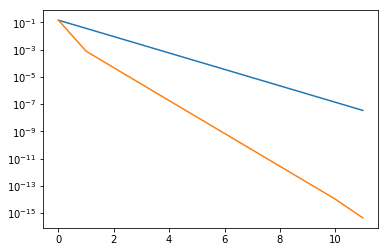

In [30]:
n=11
a=archim(n)
s=snell(n)
d=[abs(aa-np.pi) for aa in a]
ds=[abs(ss-np.pi) for ss in s]
plt.yscale('log')
plt.plot(d)
plt.plot(ds)
plt.show()

In [44]:
wallis(1000000,100000)

[4.0,
 3.1416005075026887,
 3.1415965805634114,
 3.1415952715760076,
 3.1415946170808917,
 3.141594224383365,
 3.141593962584824,
 3.1415937755857586,
 3.1415936353363727,
 3.141593526253515]

In [55]:
leibniz(1000000,100000)

[4.0,
 3.1416026534897203,
 3.141597653564762,
 3.14159598691202,
 3.141595153583494,
 3.1415946535856922,
 3.1415943202535703,
 3.1415940821590773,
 3.141593903588155,
 3.1415937646996386]

In [67]:
newtonpi(10)

[3.299038105676658,
 3.1490381056766577,
 3.1423416771052288,
 3.1416906354385628,
 3.1416074056800398,
 3.141595081273489,
 3.1415930785574249,
 3.1415927314480228,
 3.1415926683631725,
 3.141592656472179]

In [73]:
pbpi(10)

[4.0,
 3.3137084989847607,
 3.1825978780745285,
 3.1517249074292559,
 3.1441183852459047,
 3.1422236299424573,
 3.141750369168967,
 3.1416320807031828,
 3.1416025102568104,
 3.1415951177495907]

In [108]:
descartes(10)

[4.0,
 3.3137084989847607,
 3.1825978780745281,
 3.1517249074292564,
 3.1441183852459047,
 3.1422236299424577,
 3.141750369168967,
 3.1416320807031823,
 3.141602510256809,
 3.1415951177495893]

In [86]:
machin(11)

[3.18326359832636,
 3.1405970293260603,
 3.1416210293250346,
 3.1415917721821773,
 3.1415926824043994,
 3.1415926526153086,
 3.141592653623555,
 3.1415926535886025,
 3.141592653589836,
 3.1415926535897922,
 3.141592653589794,
 3.1415926535897936]

In [97]:
madhava1(100,10)

[3.0,
 3.141406718496503,
 3.1415657346585486,
 3.1415842726746215,
 3.1415890289407766,
 3.141590769849796,
 3.1415915525457154,
 3.1415919552652216,
 3.14159218326027,
 3.1415923218861095]

In [102]:
madhava2(100,10)

[3.2,
 3.1415941599210577,
 3.1415927142889273,
 3.14159266228828,
 3.1415926557428437,
 3.141592654313336,
 3.1415926538854952,
 3.141592653728254,
 3.1415926536614514,
 3.1415926536298375]

In [105]:
madhava3(100,10)

[3.111111111111111,
 3.1415926266578715,
 3.141592653283545,
 3.1415926535695333,
 3.1415926535869207,
 3.141592653589169,
 3.141592653589615,
 3.1415926535897314,
 3.1415926535897687,
 3.1415926535897825]

In [113]:
brentsalamin(10)

[4.0,
 3.1876726427121058,
 3.1416802932976475,
 3.1415926538954508,
 3.141592653589822,
 3.1415926535898708,
 3.1415926535899685,
 3.1415926535901639,
 3.1415926535905547,
 3.1415926535913363]

In [114]:
np.pi

3.141592653589793

In [120]:
borwein3(3)

[3.0, 3.1415905852058974, 3.1415926535898042]

In [129]:
borwein4(3)

[2.9142135623730985, 3.1415926462135473, 3.1415926535897931]

In [134]:
ramanujan(3)

[3.1415927300133055, 3.141592653589794, 3.1415926535897931]